# Project 3: Reddit

## Data Modeling and Evaluation

In [93]:
#import libraries
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier,BaggingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import plot_confusion_matrix,plot_roc_curve,roc_auc_score,confusion_matrix,accuracy_score,classification_report

**Read in combined Violinist and Cello csv "reddit_data" to begin modeling**

In [2]:
reddit_data = pd.read_csv('../data/reddit_data.csv')

In [3]:
# Check dataframe
reddit_data.head()

,author_id,posted_on,author_tag,post_title,post_description,subreddit_name
0,o24eoj,2021-06-17 18:41:15,Advanced,ysaÿe violin concerto e minor first movement l...,[https://www.youtube.com/watch?v=PONbtxcPcKQ](...,1
1,o23xyv,2021-06-17 18:21:58,NaN,video perform exampl great vibrato,I've been struggling with my vibrato and am lo...,1
2,o20e4w,2021-06-17 15:48:10,Adult Beginner,count time 6 8,My current rhythm exercise is in 6/8 time.\n\n...,1
3,o1vxwd,2021-06-17 12:22:01,NaN,interest pick violin,"Hello everyone, as you can tell by the title I...",1
4,o1rmpe,2021-06-17 07:49:56,NaN,question beginn,"When the score says Sul G, Sul D, IVeme chord,...",1


In [4]:
# Pull out rows in the dataframe with null values 
# Since there are no titles or post text for these rows, we will drop them
reddit_data[reddit_data['post_title'].isna()]

,author_id,posted_on,author_tag,post_title,post_description,subreddit_name
381,n9jckr,2021-05-10 23:34:01,NaN,NaN,f,1


In [5]:
# Drop all row with 'nan' values
reddit_data.drop(reddit_data.index[381],inplace=True)

In [6]:
#check if row got dropped
reddit_data[reddit_data['post_title'].isna()]

,author_id,posted_on,author_tag,post_title,post_description,subreddit_name


**Set X and y**

In [7]:
X = reddit_data['post_title']
y = reddit_data['subreddit_name']

In [8]:
# Check shape of X and y
print(f'Shape of X: {X.shape}')
print(f'Shape of y: {y.shape}')

Shape of X: (2086,)
Shape of y: (2086,)


In [9]:
#Display X first three rows
X.head(3)

0    ysaÿe violin concerto e minor first movement l...
1                   video perform exampl great vibrato
2                                       count time 6 8
Name: post_title, dtype: object

In [10]:
#Display y first three rows
y.head(3)

0    1
1    1
2    1
Name: subreddit_name, dtype: int64

In [11]:
#Display y last three rows
y.tail(3)

2084    0
2085    0
2086    0
Name: subreddit_name, dtype: int64

**Baseline Accuracy**

In [12]:
y.value_counts(normalize=True)

1    0.507191
0    0.492809
Name: subreddit_name, dtype: float64

- Violinist = 1 and Cello = 0
- The baseline Accuracy is the score of the majority class. Since the majority class is Violinist, the baseline score is about 0.507

**Train Test Split**

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=42, 
                                                    stratify=y)# account for slight class unbalance

In [14]:
# Check shape of X_train and X_test
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')

Shape of X_train: (1564,)
Shape of X_test: (522,)


### CountVectorize the data

In [15]:
# Instantiate a CountVectorizer.
cv = CountVectorizer(min_df=2,                   # Ignore words that do not occur at least 2 times
                    ngram_range=(1,5))          # Set ngram_range

In [16]:
# Fit the CountVectorizer to the training and testing data
cv_train = cv.fit_transform(X_train)            
cv_test = cv.transform(X_test)

In [17]:
# Create cv_train dataframe
cv_train_df = pd.DataFrame(cv_train.toarray(), columns = cv.get_feature_names())
cv_train_df.head()

,10,100,11,15,18,18 year,18 year old,1965,1965 sure,1st,...,yamaha,yamaha svc,year,year break,year old,young,youth,youtub,zoom,zoom meetup
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# Create cv_test dataframe
cv_test_df = pd.DataFrame(cv_test.toarray(), columns = cv.get_feature_names())
cv_test_df.head()

,10,100,11,15,18,18 year,18 year old,1965,1965 sure,1st,...,yamaha,yamaha svc,year,year break,year old,young,youth,youtub,zoom,zoom meetup
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# Check shape of cv_train and cv_test
print(f'Shape of cv_train: {cv_train.shape}')
print(f'Shape of cv_test: {cv_test.shape}')

Shape of cv_train: (1564, 1332)
Shape of cv_test: (522, 1332)


In [20]:
#commonwords
cv_train_df.sum().sort_values(ascending=False).head(12)

cello       286
violin      261
play        132
string      108
bow          91
music        90
piec         69
question     68
help         68
practic      61
beginn       61
learn        58
dtype: int64

**Logistic Regression**

In [21]:
# Instantiate model 
lr = LogisticRegression(penalty = 'l1', C =10 ,solver="liblinear") #Lasso Regularization
# Fit model
lr.fit(cv_train, y_train)
# Evaluate model.
print("Logistic Regression".center(25, "="))
print(lr.score(cv_train, y_train))
print(lr.score(cv_test, y_test))
print()

===Logistic Regression===
0.9597186700767263
0.7164750957854407



In [22]:
# Instantiate model 
lr = LogisticRegression(penalty = 'l2', C =10 ,solver="liblinear") #Ridge Regularization
# Fit model
lr.fit(cv_train, y_train)
# Evaluate model.
print("Logistic Regression".center(25, "="))
print(lr.score(cv_train, y_train))
print(lr.score(cv_test, y_test))
print()

===Logistic Regression===
0.9526854219948849
0.7509578544061303



- The Logistic Regression model has a higher training score than the testing score under both Lasso and Ridge penalties  meaning that the model is overfit.
-  In both cases, the model performs well on the training data, but there is a significan dropoff in performance in the testing data.

**Multinomial Naive Bayes Model**

In [23]:
# Instantiate model 
mnb = MultinomialNB()
# Fit model
mnb.fit(cv_train, y_train)
# Evaluate model.
print("MNB".center(18, "="))
print(mnb.score(cv_train, y_train))
print(mnb.score(cv_test, y_test))
print()

=======MNB========
0.860613810741688
0.7298850574712644



- Multinomial Naive Bayes Model is also overfit. 
- When compared to Logistic Regression ,this model performs worse on the training data and similarly on the testing data.

**Decision Tree Classifier**

In [24]:
# Instantiate model with random_state = 42.
dt = DecisionTreeClassifier(random_state=42,max_depth=500)
# Fit model
dt.fit(cv_train, y_train)
# Evaluate model.
print("Decision Tree".center(18, "="))
print(dt.score(cv_train, y_train))
print(dt.score(cv_test, y_test))
print()

==Decision Tree===
0.9763427109974424
0.7088122605363985



- Decision Tree Classififer is also overfit.
- When compared to Logistic Regression and Multinomial Naive Bayes testing score is lower
- When compared to Logistic Regression and Multinomial Naive Bayes training score is higher

**Bagging Classifier**

In [25]:
# Instantiate model
bag = BaggingClassifier(random_state=42, n_estimators=100)
# Fit model
bag.fit(cv_train, y_train)
# Evaluate model.
print("Bagging Classifier".center(18, "="))
print(bag.score(cv_train, y_train))
print(bag.score(cv_test, y_test))
print()

Bagging Classifier
0.9763427109974424
0.7030651340996169



- Bagging Classifier is also overfit.

**Extra Trees Classifier**

In [26]:
# Instantiate model
et = ExtraTreesClassifier(random_state=42, n_estimators=50,max_depth=1000)
# Fit model
et.fit(cv_train, y_train)
# Evaluate model.
print("Extra Trees Classifier".center(18, "="))
print(et.score(cv_train, y_train))
print(et.score(cv_test, y_test))
print()

Extra Trees Classifier
0.9763427109974424
0.7241379310344828



- Extra Trees Classifier is also overfit.

**Random Forest Classifier**

In [27]:
# Instantiate model
rfc = RandomForestClassifier(random_state=42, n_estimators=500,max_depth=1000)
# Fit model
rfc.fit(cv_train, y_train)
# Evaluate model.
print("Random Forest Classifier".center(18, "="))
print(rfc.score(cv_train, y_train))
print(rfc.score(cv_test, y_test))
print()

Random Forest Classifier
0.9763427109974424
0.7068965517241379



- The Random Forest Model is also overfit and performs very similarly to the Extra Trees and Bagging classifier  on  training data.

**The best model under CountVectorizer is  Logistic Regression Model (Ridge) based on test scores**

|                	| LogisticRegression(Lasso) 	| LogisticRegression(Ridge) 	|  MNB  	| Decision Tree  	| Bagging Classifier 	|  Extra Trees  	| Random Forest  	|
|:--------------:	|:-------------------------:	|:-------------------------:	|:-----:	|:--------------:	|:------------------:	|:-------------:	|:--------------:	|
| Training score 	|           0.959           	|           0.952           	| 0.860 	|      0.976     	|        0.976       	|     0.976     	|      0.976     	|
|  Testing score 	|           0.714           	|           0.750           	| 0.729 	|      0.708     	|        0.703       	|     0.724     	|      0.706     	|

**GridSearch**

In [28]:
# Instantiate model
lr_gs = LogisticRegression(random_state=42,solver='liblinear')
# Create dictionary of hyperparameters.
# The keys MUST match the names of the arguments!
lr_params = {'penalty': ['l1', 'l2'],
         'C': [0.01,0.1,1.0,10.0,50.0]}
# Instantiate our GridSearchCV object.
gs = GridSearchCV(estimator=lr_gs, param_grid=lr_params, cv=5,verbose=1)
# Fit the GridSearchCV object to the data
gs.fit(cv_train, y_train)
# Print out the score.
print(f'Best Score: {gs.best_score_}')
print(f'Best Parameters:{gs.best_params_}')
print("Grid Search".center(18, "="))
print(gs.score(cv_train, y_train))
print(gs.score(cv_test, y_test))
print()

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Score: 0.7333579093962481
Best Parameters:{'C': 0.1, 'penalty': 'l2'}
===Grid Search====
0.8478260869565217
0.7145593869731801



- After running our GridSearch model we see that our best score is a 0.733. 
- However, when we score our Gridsearch model to the training and testing data, the model doesn't perform better compared to the original model that we ran. 

### TfidfVectorizer

In [29]:
# Instantiate the transformer.
tf = TfidfVectorizer(min_df=2,                   # Ignore words that do not occur at least 2 times
                    ngram_range=(1,5))          # Set ngram_range

In [30]:
tf_train = tf.fit_transform(X_train)            # Fit the TfidfVectorizer to the training data
tf_test = tf.transform(X_test)                  # Fit the TfidfVectorizer to the testing data

In [31]:
# Create tf_train dataframe
tf_train_df = pd.DataFrame(tf_train.toarray(), columns = tf.get_feature_names())
tf_train_df.head()

,10,100,11,15,18,18 year,18 year old,1965,1965 sure,1st,...,yamaha,yamaha svc,year,year break,year old,young,youth,youtub,zoom,zoom meetup
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.639188,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
# Create tf_test dataframe
tf_test_df = pd.DataFrame(tf_test.todense(), columns = tf.get_feature_names())
tf_test_df.head()

,10,100,11,15,18,18 year,18 year old,1965,1965 sure,1st,...,yamaha,yamaha svc,year,year break,year old,young,youth,youtub,zoom,zoom meetup
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
# Check shape of tf_train and tf_test
print(f'Shape of tf_train: {tf_train.shape}')
print(f'Shape of tf_test: {tf_test.shape}')

Shape of tf_train: (1564, 1332)
Shape of tf_test: (522, 1332)


**Logistic Regression**

In [34]:
# Instantiate model 
logreg = LogisticRegression(penalty = 'l1', C =500 ,solver="liblinear") #Lasso Regularization
# Fit model
logreg.fit(tf_train, y_train)
# Evaluate model.
print("Logistic Regression".center(25, "="))
print(logreg.score(tf_train, y_train))
print(logreg.score(tf_test, y_test))
print()

===Logistic Regression===
0.9661125319693095
0.7241379310344828



In [35]:
# Instantiate model 
logreg = LogisticRegression(penalty = 'l2', C =500 ,solver="liblinear") #Ridge Regularization
# Fit model
logreg.fit(tf_train, y_train)
# Evaluate model.
print("Logistic Regression".center(25, "="))
print(logreg.score(tf_train, y_train))
print(logreg.score(tf_test, y_test))
print()

===Logistic Regression===
0.9661125319693095
0.7241379310344828



- The Logistic Regression model has a higher training score than the testing score under both Lasso and Ridge penalties meaning that the model is overfit. 
- In both cases, the model performs well on the training data, but there is a significant dropoff in performance in the testing data.

| TFIDF 	| Train Score 	| Test Score 	|
|:-----:	|:-----------:	|:----------:	|
| Lasso 	|     0.966     |     0.726     |
| Ridge 	|     0.966     |     0.724     |

|  CV    	| Train Score 	| Test Score 	|
|:-----:	|:-----------:	|:----------:	|
| Lasso 	|     0.959     |     0.714     |
| Ridge 	|     0.952     |        0.750  |

- In comparison with the CountVectorizer, the training score for both Lasso and Ridge are higher under the Tfidf
- Ridge testing score was lower  in Tfidf compared to CV Ridge test score , however Lasso test score was higher in Tfidf compared to CV

**Multinomial Naive Bayes Model**

In [36]:
# Instantiate model 
mnb_tf = MultinomialNB()
# Fit model
mnb_tf.fit(tf_train, y_train)
# Evaluate model.
print("MNB".center(18, "="))
print(mnb_tf.score(tf_train, y_train))
print(mnb_tf.score(tf_test, y_test))
print()

=======MNB========
0.8734015345268542
0.7375478927203065



|       	| Train Score 	| Test Score 	|
|:-----:	|:-----------:	|:----------:	|
| TFIDF 	|     0.873     |   0.737       |
|   CV  	|     0.860     |   0.729       |

- Model is still overfit under the Tfidf.
- The training and testing score performed better than the model under the CountVectorizer.

**Decision Tree Classifier**

In [37]:
# Instantiate model with random_state = 42.
dt_tf = DecisionTreeClassifier(random_state=42,max_depth=100)
# Fit model
dt_tf.fit(tf_train, y_train)
# Evaluate model.
print("Decision Tree".center(18, "="))
print(dt_tf.score(tf_train, y_train))
print(dt_tf.score(tf_test, y_test))
print()

==Decision Tree===
0.909846547314578
0.7452107279693486



|       	| Train Score 	| Test Score 	|
|:-----:	|:-----------:	|:----------:	|
| TFIDF 	|     0.909     |   0.745       |
|   CV  	|     0.976     |   0.708       |

- Model is still overfit under the Tfidf.
- Testing score performed better than the model under the CountVectorizer.
- Training score performed better in the CountVectorizer than under the Tfidf.

**Bagging Classifier**

In [38]:
# Instantiate model
bag_tf = BaggingClassifier(random_state=42, n_estimators=500)
# Fit model
bag_tf.fit(tf_train, y_train)
# Evaluate model.
print("Bagging Classifier".center(18, "="))
print(bag_tf.score(tf_train, y_train))
print(bag_tf.score(tf_test, y_test))
print()

Bagging Classifier
0.9763427109974424
0.7164750957854407



|       	| Train Score 	| Test Score 	|
|:-----:	|:-----------:	|:----------:	|
| TFIDF 	|     0.976     |    0.716      |
|   CV  	|     0.976     |    0.703      |

- Model is still overfit under the Tfidf.
- Testing score performed slightly better than the model under the CountVectorizer.

**Extra Trees Classifier**

In [39]:
# Instantiate model
et_tf = ExtraTreesClassifier(random_state=42, n_estimators=50,max_depth=1000)
# Fit model
et_tf.fit(tf_train, y_train)
# Evaluate model.
print("Extra Trees Classifier".center(18, "="))
print(et_tf.score(tf_train, y_train))
print(et_tf.score(tf_test, y_test))
print()

Extra Trees Classifier
0.9763427109974424
0.7337164750957854



|       	| Train Score 	| Test Score 	|
|:-----:	|:-----------:	|:----------:	|
| TFIDF 	|    0.976      |    0.733      |
|   CV  	|    0.976      |    0.724      |

- Model is still overfit under the Tfidf.
- Testing score performed slightly better than the model under the CountVectorizer.

**Random Forest Classifier**

In [40]:
# Instantiate model
rfc_tf = RandomForestClassifier(random_state=42, n_estimators=50,max_depth=1000)
# Fit model
rfc_tf.fit(tf_train, y_train)
# Evaluate model.
print("Random Forest Classifier".center(18, "="))
print(rfc_tf.score(tf_train, y_train))
print(rfc_tf.score(tf_test, y_test))
print()

Random Forest Classifier
0.9763427109974424
0.7203065134099617



|       	| Train Score 	| Test Score 	|
|:-----:	|:-----------:	|:----------:	|
| TFIDF 	|   0.976       |     0.720     |
|   CV  	|   0.976     	|     0.706    	|

- Model is still overfit under the Tfidf.
- Testing score performed slightly better than the model under the CountVectorizer.

**The best model under Tfidf Vectorizer is Random Forest based on test and train scores**

|                	| LogisticRegression(Lasso) 	| LogisticRegression(Ridge) 	|  MNB  	| Decision Tree 	| Bagging Classifier 	| Extra Trees 	| Random Forest 	|
|:--------------:	|:-------------------------:	|:-------------------------:	|:-----:	|:-------------:	|:------------------:	|:-----------:	|:-------------:	|
| Training score 	|           0.966           	|           0.966           	| 0.873 	|     0.909     	|        0.976       	|    0.976    	|     0.976     	|
|  Testing score 	|           0.726           	|           0.724           	| 0.737 	|     0.745     	|        0.716       	|    0.733    	|     0.720     	|

**GridSearch**

In [41]:
# Instantiate model
rfc_gs = RandomForestClassifier(random_state=42)
# Create dictionary of hyperparameters.
# The keys MUST match the names of the arguments!
param_grid = {
    'n_estimators': [10, 50, 100,500],
    'max_depth': [10,20,50,100]
}
# Instantiate our GridSearchCV object.
gs_tf = GridSearchCV(estimator=rfc_gs, param_grid=param_grid, cv=5,verbose=1)
# Fit the GridSearchCV object to the data
gs_tf.fit(cv_train, y_train)
# Print out the score.
print(f'Best Score: {gs_tf.best_score_}')
print(f'Best Parameters:{gs_tf.best_params_}')
print("Grid Search".center(18, "="))
print(gs_tf.score(tf_train, y_train))
print(gs_tf.score(tf_test, y_test))
print()

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Score: 0.7327312197919227
Best Parameters:{'max_depth': 100, 'n_estimators': 50}
===Grid Search====
0.698849104859335
0.5804597701149425



- After running our GridSearch model we see that our best score is a 0.732.
- However, when we score our Gridsearch model to the training and testing data, the model doesn't perform better compared to the original model that we ran.

### Evaluation

|             	    |      **Count Vectorizer**         |     **TFIDF Vectorizer**      |
|:-----------:	    |:--------------------------:	    |:------------------------:	    |
|  **GridSearch** 	| **Logistic Regression(Ridge)** 	| **Random Forest Classifier** 	|
|  **Best Score** 	|            **0.733**              |            **0.732**          |
| **Train Score**	|            **0.847**              |            **0.698**          |
|  **Test Score** 	|            **0.714**              |            **0.580**          |

- Data Modeling has been done using Logistic Regression, Multinomial Naive Bayes, Decision Tree, Bagging Tree, Random Forest and Extra Trees models under both CountVectorizer and TfidfVectorizer.
- **Based on the above  Grid Search scores,we can conclude that the most accurate model is the Logistic Regression model under the CountVectorizer.**

Text(0.5, 0.98, 'ROC curve comparison')

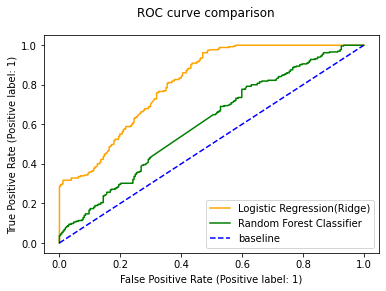

In [95]:
#https://stackoverflow.com/questions/42894871/how-to-plot-multiple-roc-curves-in-one-plot-with-legend-and-auc-scores-in-python/42895367
#plot roc curve for both Logistic Regression(Ridge) under CountVectorizer and Random Forest Classifier under TfidfVectorizer.
fig = plot_roc_curve(gs, cv_test, y_test,color='orange', label='Logistic Regression(Ridge)')
fig = plot_roc_curve( gs_tf, tf_test, y_test, ax = fig.ax_,color='green', label='Random Forest Classifier')
# add worst case scenario line
plt.plot([0, 1], [0,1], label='baseline', linestyle='--',color='blue')
# add a legend
plt.legend()
#add a title
fig.figure_.suptitle("ROC curve comparison")

In [91]:
#https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/
#AUC ROC Score of both Logistic Regression(Ridge) under CountVectorizer and Random Forest Classifier under TfidfVectorizer.
#Get prediction probabilities
print(f'AUC ROC Score of Logistic Regression(Ridge): {roc_auc_score(y_test, gs.predict_proba(cv_test)[:,1])}')
print(f'AUC ROC Score of Random Forest Classifier: {roc_auc_score(y_test, gs_tf.predict_proba(tf_test)[:,1])}')

AUC ROC Score of Logistic Regression(Ridge): 0.808809925849791
AUC ROC Score of Random Forest Classifier: 0.6049922913148814


- **If AUC ROC score is between 0.5-1 it means that the model will be able to distinguish between positive and negative class.**
- **More closer to 1 the score is better is the model performance,as AUC ROC Score of  Logistic Regression(Ridge) under CountVectorizer is near to 1 compared to Random Forest Classifier under TfidfVectorizer,we can conclude that Logistic Regression(Ridge) under CountVectorizer is an accurate model.**

In [42]:
# Created a dataframe of all coefficients and sorted by descending values of best scoring model
# The top features and coefficients that will determine whether a post is a Violinist post
gs_df = pd.DataFrame({
   'words' : cv_train_df.columns.tolist(), #get column names to a list
   'coefficients'   : gs.best_estimator_.coef_[0]#get coefficients in a single list
})
gs_df['coefficients'] = gs_df['coefficients'].astype('string')

In [43]:
# Top 10 features that determine a Violin post
violin = gs_df.sort_values(by='coefficients',ascending=False).head(10)
violin

,words,coefficients
1232,violin,2.1019728563027904
1266,violinist,0.7765836193595219
1136,teacher,0.39651751468155955
845,play,0.3154386786384424
644,long,0.3064133280540022
958,rest,0.30524923001487037
1018,shoulder,0.2800753864555544
585,keep,0.27423096003819153
860,pleas,0.26851949188437774
1228,vibrato,0.2553105087236835


In [44]:
# Top 10 features that determine a Cello post
cello = gs_df.sort_values(by='coefficients',ascending=False).tail(10)
cello

,words,coefficients
293,david,-0.0012446246495965993
106,band,-0.0009921623739746882
772,often,-0.0009713576172240508
1291,weight,-0.0007918916183026476
338,either,-0.0007414186904167742
138,bought first,-0.0006092877064450305
538,hickey,-0.0002399656139939714
1026,singl,-0.00019798552206553644
1129,talk,-0.00019353833165754457
178,camp,-0.00012486655447993352


In [45]:
# Use best scoring model to evaluate
predictions = gs.predict(cv_test) #generate predictions
cm = confusion_matrix(y_test, predictions) #generate confusion matrix
cm

array([[167,  90],
       [ 59, 206]])

In [46]:
# Convert confusion matrix to dataframe
cm_df = pd.DataFrame(cm,
                    columns = ['predicted violin', 'predicted cello'],
                    index = ['actual violin', 'actual cello'])
cm_df

,predicted violin,predicted cello
actual violin,167,90
actual cello,59,206


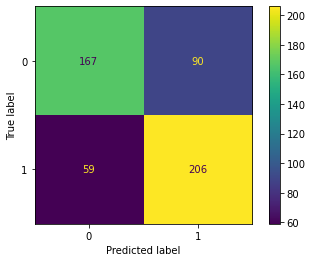

In [47]:
#plot confusion matrix of the best scoring model
plot_confusion_matrix(gs, cv_test, y_test)

In [48]:
# Calculate model accuracy
accuracy = accuracy_score(y_test, predictions)
accuracy

0.7145593869731801

|**Baseline Accuracy**| **Model Accuracy**|
|-------------------|---------------|
|     **0.507**   |      **0.714**|

**Based on the above scores,we can conclude that our model performs better than baseline model**

In [67]:
# Calculate Misclassification
Error = 1-accuracy
Error

0.2854406130268199

In [92]:
#Classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.74      0.65      0.69       257
           1       0.70      0.78      0.73       265

    accuracy                           0.71       522
   macro avg       0.72      0.71      0.71       522
weighted avg       0.72      0.71      0.71       522



In [52]:
# Mash up X and y test values into one df
test_df = pd.concat([X_test, y_test], axis=1)

# Add predictions to df
test_df['predictions'] = predictions

In [68]:
#Shape of test_df
test_df.shape

(522, 4)

In [55]:
#https://www.kaggle.com/jannen/model-error-analysis
#Add 'error' column to df
test_df['error'] = abs(test_df['subreddit_name'] - test_df['predictions']) 
test_df.head(15)

,post_title,subreddit_name,predictions,error
304,third violin player play louder first melodi,1,1,0
429,e string harmon notat begin violinist,1,1,0
95,abrsm grade 5,1,1,0
1311,capo cello,0,0,0
2078,virtual orchestra project announc novemb 2020 ...,0,0,0
176,self taught violinist 6 month,1,1,0
1750,ginastera vs ligeti term difficulti,0,1,1
177,self taught violinist 6 month,1,1,0
360,adult beginn look onlin learn resourc,1,0,1
1978,john juzek cello age,0,0,0


In [56]:
# List of biggest errors in decreasing order
sorted = test_df.sort_values(by=['error'], ascending=False)

In [59]:
#False Positive with biggest error
#Cello but predicted as Violinist
sorted[ sorted['subreddit_name']==0] [0:14]

,post_title,subreddit_name,predictions,error
1073,help musician id,0,1,1
1919,favorit kind humidifi,0,1,1
1265,often swap bow hair,0,1,1
1091,r autisticmusician,0,1,1
1794,vibrato even real,0,1,1
1633,random gear bought late super worth,0,1,1
1150,would one begin practic use vibrato,0,1,1
1555,bow case question,0,1,1
1250,adult beginn look advic concern vibrato,0,1,1
1218,tip beginn,0,1,1


In [77]:
#False Negative with biggest error
#Violinist but predicted as Cello
sorted[ sorted['subreddit_name']==1] [0:14]

,post_title,subreddit_name,predictions,error
701,creat welcom messag new subscrib,1,0,1
301,solo show piec,1,0,1
126,bach vivaldi,1,0,1
238,tablet sheet music,1,0,1
28,anyon fun altern tune scordatura,1,0,1
491,eastman master versu young master,1,0,1
993,anyon tri mix vison titanium solo regular visi...,1,0,1
932,slip thumb,1,0,1
155,onlin middl school string camp perhap uk austr...,1,0,1
635,practic posit,1,0,1


In [65]:
#Rows where predictions were correct
test_df[test_df['error'] ==0]

,post_title,subreddit_name,predictions,error
304,third violin player play louder first melodi,1,1,0
429,e string harmon notat begin violinist,1,1,0
95,abrsm grade 5,1,1,0
1311,capo cello,0,0,0
2078,virtual orchestra project announc novemb 2020 ...,0,0,0
...,...,...,...,...
961,abracadabra book violin,1,1,0
1072,harp cello tailpiec,0,0,0
2030,intens thumb muscl fatigu,0,0,0
396,29 year old softwar engin live rv want learn p...,1,1,0


In [79]:
#Rows where predictions were incorrect
test_df[test_df['error'] ==1]

,post_title,subreddit_name,predictions,error
1750,ginastera vs ligeti term difficulti,0,1,1
360,adult beginn look onlin learn resourc,1,0,1
529,pandem mood shostakovich concerto 1 1st movement,1,0,1
644,beginn piec,1,0,1
452,mother day piec recommend,1,0,1
...,...,...,...,...
1745,simpl trick improv shift,0,1,1
117,time three free onlin event 6 8 21 6pm pacif,1,0,1
1749,develop bad habit practic without instructor,0,1,1
1099,know readi mayb recit,0,1,1


- **The Logistic Regression model under the CountVectorizer, can predict whether a given post comes from the Violinist or Cello subreddit with reasonably better accuracy.**
- **Accuracy score is 0.714 whereas Error Score is 0.285.**
- **149 predictions were misclassified i.e. our model  predictions on  whether a post belongs to Violinist or Cello subreddit were wrong  for 149 random posts in test data.**
- **Based on roc_auc_score,it can be concluded that Logistic Regression model under the CountVectorizer  is able to to detect more numbers of True positives and True negatives than False negatives and False positives.**